In [1]:
import stumpy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
data = pd.read_csv('C:/Users/ale/Documents/Tec/sleep_episodes/00001/sleep_1.csv')
data.head()

,t,x,y,z,annotation0,arm_angle,change
0,49.865856,0.808,-0.430,0.382,t_turn,NaN,NaN
1,49.915904,0.754,-0.610,0.248,t_turn,NaN,NaN
2,49.965952,0.470,-0.820,0.182,t_turn,NaN,NaN
3,50.016000,0.274,-0.796,0.192,t_turn,NaN,NaN
4,50.065856,0.104,-0.994,0.040,t_turn,NaN,NaN


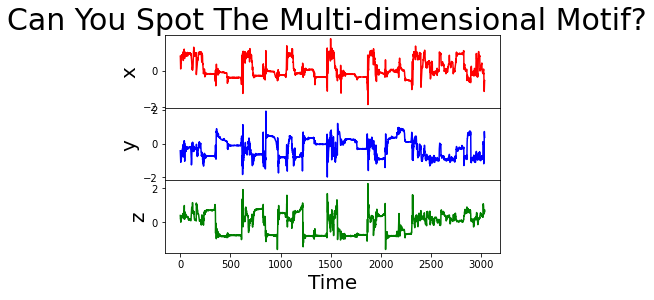

In [3]:
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')

axs[0].set_ylabel(f'x', fontsize='20')
axs[0].set_xlabel('Time', fontsize ='20')
axs[0].plot(data['x'],  color='r')

axs[1].set_ylabel(f'y', fontsize='20')
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].plot(data['y'],  color='b')

axs[2].set_ylabel(f'z', fontsize='20')
axs[2].set_xlabel('Time', fontsize ='20')
axs[2].plot(data['z'],  color='g')

plt.show()

In [4]:
m = 500
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps['x'] = sp.stump(data['x'], m)
motif_distance = np.round(mps['x'][:, 0].min(), 1)
print(f"The motif pair matrix profile value in x is {motif_distance}")
motifs_idx['x'] = np.argsort(mps['x'][:, 0])[:2]

mps['y'] = sp.stump(data['y'], m)
motif_distance = np.round(mps['y'][:, 0].min(), 1)
print(f"The motif pair matrix profile value in y is {motif_distance}")
motifs_idx['y'] = np.argsort(mps['y'][:, 0])[:2]

mps['z'] = sp.stump(data['z'], m)
motif_distance = np.round(mps['z'][:, 0].min(), 1)
print(f"The motif pair matrix profile value in z is {motif_distance}")
motifs_idx['z'] = np.argsort(mps['z'][:, 0])[:2]

The motif pair matrix profile value in x is 10.7
The motif pair matrix profile value in y is 16.2
The motif pair matrix profile value in z is 9.6


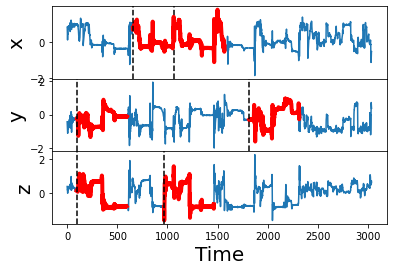

In [5]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})

axs[0].set_ylabel('x', fontsize='20')
axs[0].plot(data['x'])
axs[0].set_xlabel('Time', fontsize ='20')
for idx in motifs_idx['x']:
    axs[0].plot(data['x'].iloc[idx:idx+m], c='red', linewidth=4)
    axs[0].axvline(x=idx, linestyle="dashed", c='black')

axs[1].set_ylabel('y', fontsize='20')
axs[1].plot(data['y'])
axs[1].set_xlabel('Time', fontsize ='20')
for idx in motifs_idx['y']:
    axs[1].plot(data['y'].iloc[idx:idx+m], c='red', linewidth=4)
    axs[1].axvline(x=idx, linestyle="dashed", c='black')

axs[2].set_ylabel('z', fontsize='20')
axs[2].plot(data['z'])
axs[2].set_xlabel('Time', fontsize ='20')
for idx in motifs_idx['z']:
    axs[2].plot(data['z'].iloc[idx:idx+m], c='red', linewidth=4)
    axs[2].axvline(x=idx, linestyle="dashed", c='black')
plt.show()

In [6]:
df = data[['x', 'y', 'z']]
m = 500
mps, indices = sp.mstump(df, m)
motifs_idx = np.argsort(mps, axis=1)[:, 0]
nn_idx = indices[np.arange(len(motifs_idx)), motifs_idx]

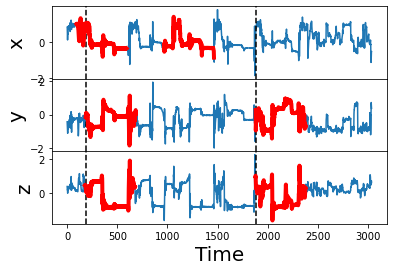

In [7]:
fig, axs = plt.subplots(mps.shape[0], sharex=True, gridspec_kw={'hspace': 0})

for k, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k].axvline(x=nn_idx[1], linestyle="dashed", c='black')
    axs[k].plot(range(motifs_idx[k], motifs_idx[k] + m), df[dim_name].iloc[motifs_idx[k] : motifs_idx[k] + m], c='red', linewidth=4)
    axs[k].plot(range(nn_idx[k], nn_idx[k] + m), df[dim_name].iloc[nn_idx[k] : nn_idx[k] + m], c='red', linewidth=4)

plt.show()

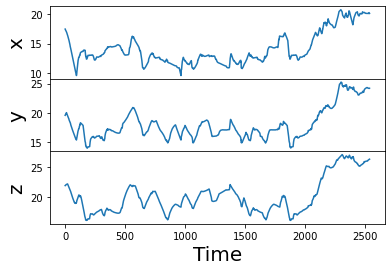

In [9]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})

axs[0].set_ylabel('x', fontsize='20')
axs[0].plot(mps[0])
axs[0].set_xlabel('Time', fontsize ='20')

axs[1].set_ylabel('y', fontsize='20')
axs[1].plot(mps[1])
axs[1].set_xlabel('Time', fontsize ='20')

axs[2].set_ylabel('z', fontsize='20')
axs[2].plot(mps[2])
axs[2].set_xlabel('Time', fontsize ='20')

plt.show()